In [1]:
import optuna
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import re
import seaborn as sns

In [2]:
def load_study(study_name):
    journal_name = f'{study_name}.log'
    study_storage = optuna.storages.JournalStorage(
        optuna.storages.JournalFileStorage(journal_name)) 
    for study in study_storage.get_all_studies():
        study_name = study_storage.get_study_name_from_id(study._study_id)
        break
    study = optuna.study.load_study(study_name=study_name, storage=study_storage)
    return study

In [3]:
def parse_studies(prefix='criteo_', suffix='.log', pattern='*.log'):
    def helper():
        for filename in glob('*.log'):
            study_name = filename.removesuffix(suffix)
            clean_name = study_name.removeprefix(prefix)
            embed_dim_match = re.search('_([0-9]+)$', clean_name)
            embed_dim = int(embed_dim_match.group(1))
            exp_name = clean_name.removesuffix(embed_dim_match.group(0))
            yield exp_name, embed_dim, study_name
    return list(helper())

In [4]:
parse_studies()

[('bins', 32, 'criteo_bins_32'),
 ('splines_0', 32, 'criteo_splines_0_32'),
 ('splines_3', 32, 'criteo_splines_3_32'),
 ('bins', 48, 'criteo_bins_48'),
 ('splines_0', 48, 'criteo_splines_0_48'),
 ('splines_3', 48, 'criteo_splines_3_48'),
 ('bins', 40, 'criteo_bins_40'),
 ('splines_3', 40, 'criteo_splines_3_40'),
 ('splines_0', 40, 'criteo_splines_0_40'),
 ('splines_3', 24, 'criteo_splines_3_24'),
 ('splines_0', 24, 'criteo_splines_0_24'),
 ('bins', 24, 'criteo_bins_24'),
 ('bins', 16, 'criteo_bins_16'),
 ('splines_3', 16, 'criteo_splines_3_16'),
 ('bins', 8, 'criteo_bins_8'),
 ('splines_0', 16, 'criteo_splines_0_16'),
 ('splines_3', 8, 'criteo_splines_3_8'),
 ('splines_0', 8, 'criteo_splines_0_8'),
 ('splines_0', 56, 'criteo_splines_0_56'),
 ('bins', 56, 'criteo_bins_56'),
 ('splines_3', 56, 'criteo_splines_3_56'),
 ('bins', 64, 'criteo_bins_64'),
 ('splines_0', 64, 'criteo_splines_0_64'),
 ('splines_3', 64, 'criteo_splines_3_64')]

In [5]:
trials_df = []
for experiment, embed_dim, study_name in parse_studies():
    study = load_study(study_name)
    print(f'Study {study_name} has {len(study.trials)} trials')

    trial_data = [trial.params | 
                  trial.user_attrs | 
                  dict(val_loss=trial.value, study_name=study_name, experiment=experiment, embed_dim=embed_dim)
                  for trial in [study.best_trial]]
    trial_data_df = pd.DataFrame.from_records(trial_data)
    trials_df.append(trial_data_df)

trials_df = pd.concat(trials_df, axis=0)
trials_df

/tmp/ipykernel_2519988/3007366955.py:3: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  study_storage = optuna.storages.JournalStorage(


Study criteo_bins_32 has 50 trials
Study criteo_splines_0_32 has 50 trials
Study criteo_splines_3_32 has 50 trials
Study criteo_bins_48 has 50 trials
Study criteo_splines_0_48 has 50 trials
Study criteo_splines_3_48 has 50 trials
Study criteo_bins_40 has 50 trials
Study criteo_splines_3_40 has 50 trials
Study criteo_splines_0_40 has 50 trials
Study criteo_splines_3_24 has 50 trials
Study criteo_splines_0_24 has 50 trials
Study criteo_bins_24 has 50 trials
Study criteo_bins_16 has 50 trials
Study criteo_splines_3_16 has 50 trials
Study criteo_bins_8 has 50 trials
Study criteo_splines_0_16 has 50 trials
Study criteo_splines_3_8 has 50 trials
Study criteo_splines_0_8 has 50 trials
Study criteo_splines_0_56 has 50 trials
Study criteo_bins_56 has 50 trials
Study criteo_splines_3_56 has 50 trials
Study criteo_bins_64 has 50 trials
Study criteo_splines_0_64 has 50 trials
Study criteo_splines_3_64 has 50 trials


,lr,l2reg,random_seed,degree,best_epoch,test_loss,val_loss,study_name,experiment,embed_dim
0,0.000120,3.157859e-08,42,0,1,0.451590,0.446994,criteo_bins_32,bins,32
0,0.000119,1.280773e-07,42,0,1,0.450906,0.446243,criteo_splines_0_32,splines_0,32
0,0.000114,6.730283e-08,42,3,1,0.450473,0.445821,criteo_splines_3_32,splines_3,32
0,0.000108,2.827414e-07,42,0,1,0.451844,0.447224,criteo_bins_48,bins,48
0,0.000096,4.389726e-06,42,0,1,0.450997,0.446305,criteo_splines_0_48,splines_0,48
0,0.000095,4.177857e-04,42,3,1,0.450431,0.445790,criteo_splines_3_48,splines_3,48
0,0.000110,6.344493e-07,42,0,1,0.451276,0.446637,criteo_bins_40,bins,40
0,0.000104,1.716062e-05,42,3,1,0.450731,0.445985,criteo_splines_3_40,splines_3,40
0,0.000102,3.169210e-05,42,0,1,0.450896,0.446257,criteo_splines_0_40,splines_0,40
0,0.000130,8.988797e-04,42,3,1,0.450712,0.446049,criteo_splines_3_24,splines_3,24


In [6]:
trials_df[['experiment', 'embed_dim', 'lr', 'l2reg']].pivot(columns=['experiment'], index='embed_dim', values=['lr', 'l2reg'])

lr                             l2reg                \
experiment      bins splines_0 splines_3          bins     splines_0   
embed_dim                                                              
8           0.000215  0.000215  0.000224  3.647227e-08  3.647227e-08   
16          0.000166  0.000159  0.000158  3.754331e-05  3.470267e-05   
24          0.000131  0.000130  0.000130  3.240514e-04  8.988797e-04   
32          0.000120  0.000119  0.000114  3.157859e-08  1.280773e-07   
40          0.000110  0.000102  0.000104  6.344493e-07  3.169210e-05   
48          0.000108  0.000096  0.000095  2.827414e-07  4.389726e-06   
56          0.000094  0.000088  0.000087  1.605617e-06  8.908989e-05   
64          0.000084  0.000084  0.000086  7.561220e-05  9.264213e-06   

                          
experiment     splines_3  
embed_dim                 
8           2.630877e-08  
16          8.908989e-05  
24          8.988797e-04  
32          6.730283e-08  
40          1.716062e-05  
48          4.177857e-04  
56          2.803387e-05  
64          6.486152e-05

In [7]:
pivoted = trials_df[['experiment', 'embed_dim', 'val_loss']].pivot(columns=['experiment'], index='embed_dim', values=['val_loss'])
pivoted

val_loss                    
experiment      bins splines_0 splines_3
embed_dim                               
8           0.447800  0.447149  0.446987
16          0.446899  0.446378  0.446125
24          0.446373  0.446044  0.446049
32          0.446994  0.446243  0.445821
40          0.446637  0.446257  0.445985
48          0.447224  0.446305  0.445790
56          0.447466  0.446559  0.446181
64          0.447533  0.446865  0.446814

In [8]:
pivoted = trials_df[['experiment', 'embed_dim', 'test_loss']].pivot(columns=['experiment'], index='embed_dim', values=['test_loss'])
pivoted

test_loss                    
experiment      bins splines_0 splines_3
embed_dim                               
8           0.452437  0.451697  0.451691
16          0.451461  0.451030  0.450868
24          0.451172  0.450681  0.450712
32          0.451590  0.450906  0.450473
40          0.451276  0.450896  0.450731
48          0.451844  0.450997  0.450431
56          0.452063  0.451206  0.450857
64          0.452410  0.451547  0.451518

In [9]:
lift_pct = (100 * (1 - pivoted.iloc[:, 1:] / pivoted.iloc[:, 0].values[:, np.newaxis]))
lift_pct

test_loss          
experiment splines_0 splines_3
embed_dim                     
8           0.163424  0.164790
16          0.095562  0.131356
24          0.108882  0.102011
32          0.151523  0.247429
40          0.084409  0.120768
48          0.187404  0.312794
56          0.189568  0.266956
64          0.190773  0.197254

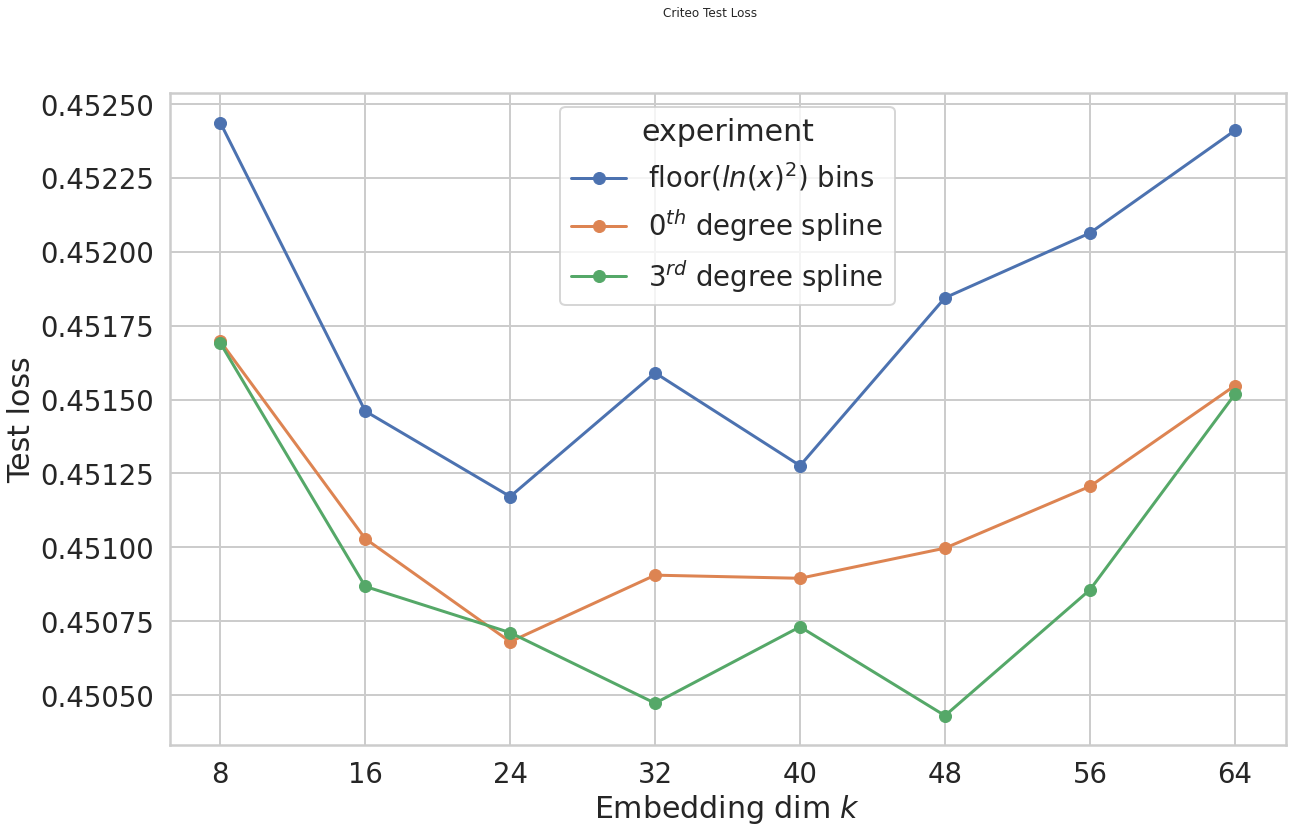

In [10]:
sns.set(context='poster', font_scale=1.25)
sns.set_style('whitegrid')

test_losses = pivoted['test_loss'].rename({
    'bins': 'floor($ln(x)^2$) bins',
    'splines_0': '$0^{th}$ degree spline',
    'splines_3': '$3^{rd}$ degree spline'
}, axis=1)
test_losses.plot(kind='line', figsize=(20, 12), xlabel='Embedding dim $k$', ylabel='Test loss', marker='o')
plt.suptitle('Criteo Test Loss')
plt.xticks(test_losses.index)
plt.show()